In [1]:
import numpy as np
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [15]:
def PLA(w: np.ndarray[np.float16], x: np.ndarray[np.float16], label: int, lr: float) -> np.ndarray[np.float16]:
    if label == 0:
        if np.dot(w, x) < 0:
            return w
        return w + lr * (-1) * x
    else:
        if np.dot(w, x) > 0:
            return w
        return w + lr * x

In [16]:
X = np.array([[2, 1], [4, 2], [5, 3], [8, 2], [8, 4], [1, 3], [1, 4], [2, 5], [3, 4], [4, 5]])
Y = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [17]:
w = np.array([1, 1], dtype=np.float16)

In [18]:
def test_results(w, X, Y):
    for i in range(Y.shape[0]):
        if np.dot(w, X[i]) < 0 and Y[i] == 1:
            return False
        if np.dot(w, X[i]) > 0 and Y[i] == 0:
            return False
    return True

In [19]:
def get_accuracy(w, X, Y):
    correct = 0
    false = 0
    
    for i in range(Y.shape[0]):
        if np.dot(w, X[i]) < 0 and Y[i] == 1:
            false += 1
        elif np.dot(w, X[i]) > 0 and Y[i] == 0:
            false += 1
        else:
            correct += 1
    return correct / (false + correct)

In [20]:
idx = 0

while not test_results(w, X, Y):
    for i in range(Y.shape[0]):
        w = PLA(w, X[i], Y[i], 0.1)
    print(f"Iteration nb°{idx}. Accuracy: %.2f%%" % (get_accuracy(w, X, Y) * 100))
    idx += 1

Iteration nb°0. Accuracy: 90.00%
Iteration nb°1. Accuracy: 100.00%


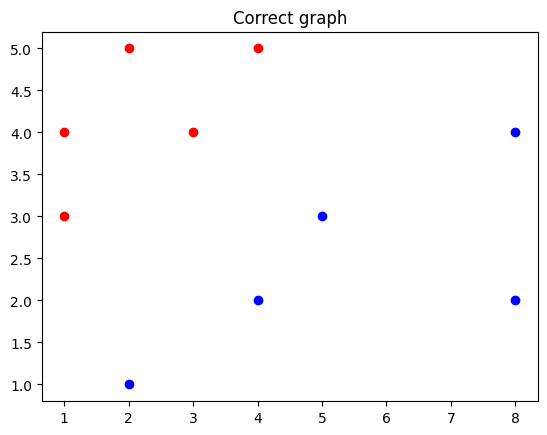

In [22]:
fig, ax = plt.subplots()

for (idx, point) in enumerate(X):
    ax.scatter(point[0], point[1], color=('blue' if Y[idx] == 0 else 'red'))
plt.title("Correct graph")
plt.show()

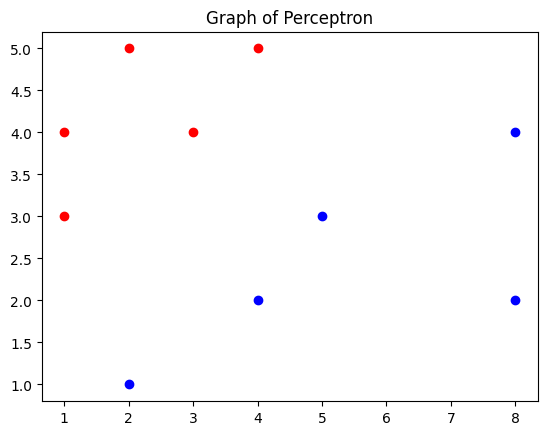

In [23]:
fig, ax = plt.subplots()

for (idx, point) in enumerate(X):
    ax.scatter(point[0], point[1], color=('blue' if np.dot(w, point) < 0 else 'red'))

plt.title("Graph of Perceptron")
plt.show()